In [ ]:
import os
import zipfile
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  

--2021-03-14 07:22:21--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.9.208, 142.250.73.208, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.9.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   149MB/s    in 0.6s    

2021-03-14 07:22:22 (149 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = tf.keras.applications.InceptionV3(include_top=False,weights= None,input_shape = (150,150,3),classes = 2,classifier_activation='binary')
pre_trained_model.load_weights(local_weights_file)


for layers in pre_trained_model.layers:
  layers.trainable = False
  #print(layers)

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
#print(pre_trained_model.summary())

last layer output shape:  (None, 7, 7, 768)


In [ ]:
last_output

<KerasTensor: shape=(None, 7, 7, 768) dtype=float32 (created by layer 'mixed7')>

In [ ]:

# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = tf.keras.layers.Dropout(0.25)(x)
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense  (1, activation='sigmoid')(x)           

model = tf.keras.Model( pre_trained_model.input, x) 

model.compile(optimizer = 'Adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


In [ ]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

--2021-03-14 07:22:29--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 172.217.15.80, 172.217.7.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   194MB/s    in 0.3s    

2021-03-14 07:22:29 (194 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref   = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(dir,'train')
test_dir = os.path.join(dir,'validation')

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255,rotation_range = 40,fill_mode = 'nearest',horizontal_flip= True,vertical_flip = True,
                                                            shear_range = 0.2,width_shift_range = 0.2,height_shift_range = 0.2)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_gen = train_datagen.flow_from_directory(train_dir,class_mode= 'binary',target_size = (150,150))
test_gen  = test_datagen.flow_from_directory(test_dir,class_mode= 'binary',target_size = (150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_gen,epochs = 50,validation_data= test_gen)

Epoch 1/50
63/63 [==============================] - 55s 308ms/step - loss: 1.7524 - accuracy: 0.6993 - val_loss: 0.1175 - val_accuracy: 0.9520
Epoch 2/50
63/63 [==============================] - 18s 280ms/step - loss: 0.3055 - accuracy: 0.8747 - val_loss: 0.1237 - val_accuracy: 0.9510
Epoch 3/50
63/63 [==============================] - 17s 276ms/step - loss: 0.2683 - accuracy: 0.8833 - val_loss: 0.1046 - val_accuracy: 0.9610
Epoch 4/50
63/63 [==============================] - 18s 286ms/step - loss: 0.2350 - accuracy: 0.8783 - val_loss: 0.1404 - val_accuracy: 0.9430
Epoch 5/50
63/63 [==============================] - 17s 277ms/step - loss: 0.2267 - accuracy: 0.9009 - val_loss: 0.0850 - val_accuracy: 0.9670
Epoch 6/50
63/63 [==============================] - 17s 277ms/step - loss: 0.2457 - accuracy: 0.8887 - val_loss: 0.1070 - val_accuracy: 0.9560
Epoch 7/50
63/63 [==============================] - 17s 276ms/step - loss: 0.2266 - accuracy: 0.8957 - val_loss: 0.1192 - val_accuracy: 0.9510

<Figure size 432x288 with 0 Axes>

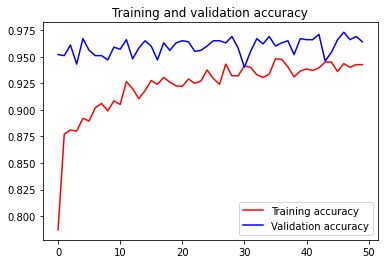

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()